## Student Detials
> Title= "Mr"\
> Name= "Ali Nawaz"\
> email = "nawazktk99@gmail.com"\
> whatsapp = "03358043653"

### In this Notebook I am are going to implement K-Mean Clustring using Scikit-learn in Python Chilla with Baba Ammar

# K-Means Clustering Algorithm 

K-Means Clustering is an unsupervised learning algorithm that aims to group the observations in a given dataset into clusters. The number of clusters is provided as an input. It forms the clusters by minimizing the sum of the distance of points from their respective cluster centroids.

**K-Means** follows an iterative process in which it tries to minimize the distance of the data points from the centroid points. It’s used to group the data points into k number of clusters based on their similarity. Euclidean distance is used to calculate the similarity. Let’s see a simple example of how K-Means clustering can be used to segregate the dataset. In this example, I am going to use the make_blobs the command to generate isotropic gaussian blobs which can be used for clustering. I passed in the number of samples to be generated to be 100 and the number of centers to be 5.

# [For More Info Click Here:](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn)

In [5]:
# import all the lib
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
import sklearn.metrics as sm
import matplotlib.pyplot as plt

# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.cluster import KMeans
#Load dataset
wine = datasets.load_wine()

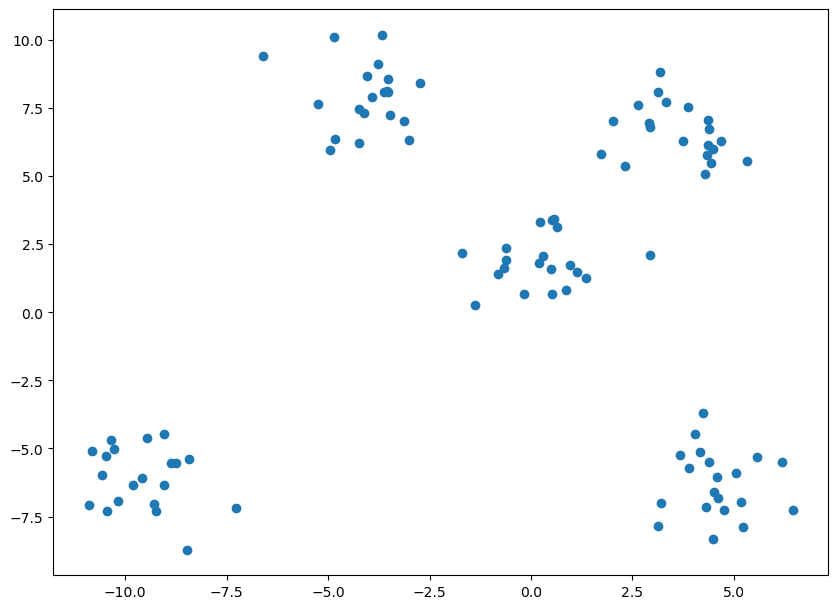

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=5, random_state=101)
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.scatter(X[:, 0], X[:, 1]);

In [6]:
Cluster = KMeans(n_clusters=5)
Cluster.fit(X)
y_pred = Cluster.predict(X)

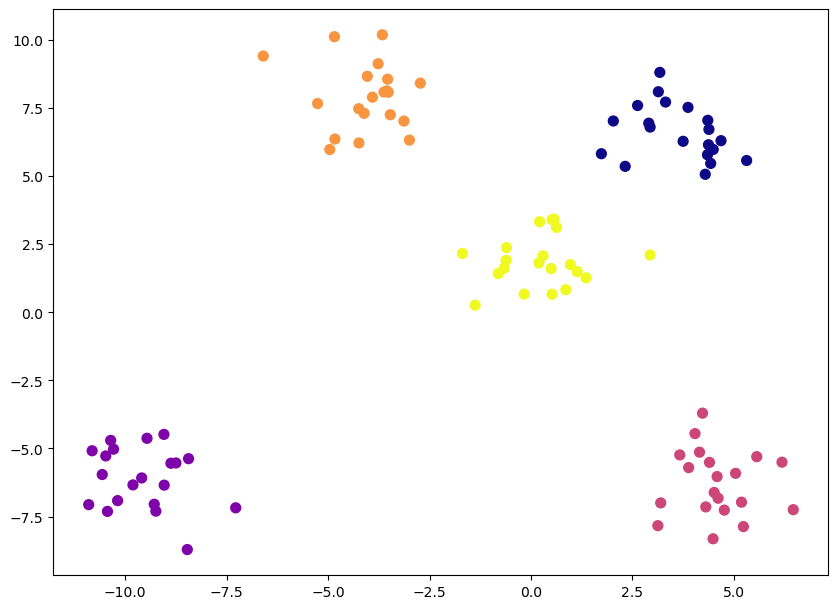

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='plasma')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})

# Steps Involved
There are 3 important steps in K-Means Clustering.
1. Initialize centroids – This is done by randomly choosing K no of points, the points can be present in the dataset or also random points.
2. Assign Clusters – The clusters are assigned to each point in the dataset by calculating their distance from the centroid and assigning it to the centroid with minimum distance.
3. Re-calculate the centroids – Updating the centroid by calculating the centroid of each cluster we have created.

![Image](https://www.machinelearningplus.com/wp-content/uploads/2020/04/step1.png)

![Image](https://www.machinelearningplus.com/wp-content/uploads/2020/04/step2.png)

![Image](https://www.machinelearningplus.com/wp-content/uploads/2020/04/step3.png)

![Image](https://www.machinelearningplus.com/wp-content/uploads/2020/04/step4.png)

![Image](https://www.machinelearningplus.com/wp-content/uploads/2020/04/step5.png)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# using the make_blobs dataset
X, y = make_blobs(n_samples=100, centers=5, random_state=101)
# setting the number of training examples
m=X.shape[0]
n=X.shape[1] 
n_iter=50

In [11]:
# computing the initial centroids randomly
K=5
import random

# creating an empty centroid array
centroids=np.array([]).reshape(n,0) 

# creating 5 random centroids
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]

In [13]:
output={}

# creating an empty array
euclid=np.array([]).reshape(m,0)

# finding distance between for each centroid
for k in range(K):
       dist=np.sum((X-centroids[:,k])**2,axis=1)
       euclid=np.c_[euclid,dist]

# storing the minimum value we have computed
minimum=np.argmin(euclid,axis=1)+1

In [14]:
# computing the mean of separated clusters
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)

# assigning of clusters to points
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]
for k in range(K):
    cent[k+1]=cent[k+1].T

# computing mean and updating it
for k in range(K):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

C:\Users\Ali\anaconda3\envs\python-chilla\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Ali\anaconda3\envs\python-chilla\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [15]:
# repeating the above steps again and again
for i in range(n_iter):
      euclid=np.array([]).reshape(m,0)
      for k in range(K):
          dist=np.sum((X-centroids[:,k])**2,axis=1)
          euclid=np.c_[euclid,dist]
      C=np.argmin(euclid,axis=1)+1
      cent={}
      for k in range(K):
           cent[k+1]=np.array([]).reshape(2,0)
      for k in range(m):
           cent[C[k]]=np.c_[cent[C[k]],X[k]]
      for k in range(K):
           cent[k+1]=cent[k+1].T
      for k in range(K):
           centroids[:,k]=np.mean(cent[k+1],axis=0)
      final=cent

Text(0.5, 1.0, 'Original Dataset')

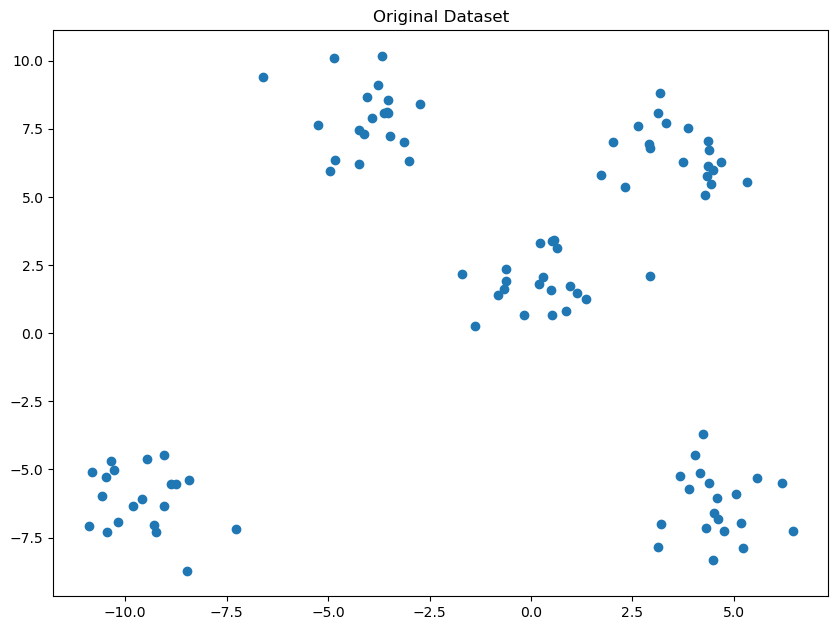

In [16]:
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')

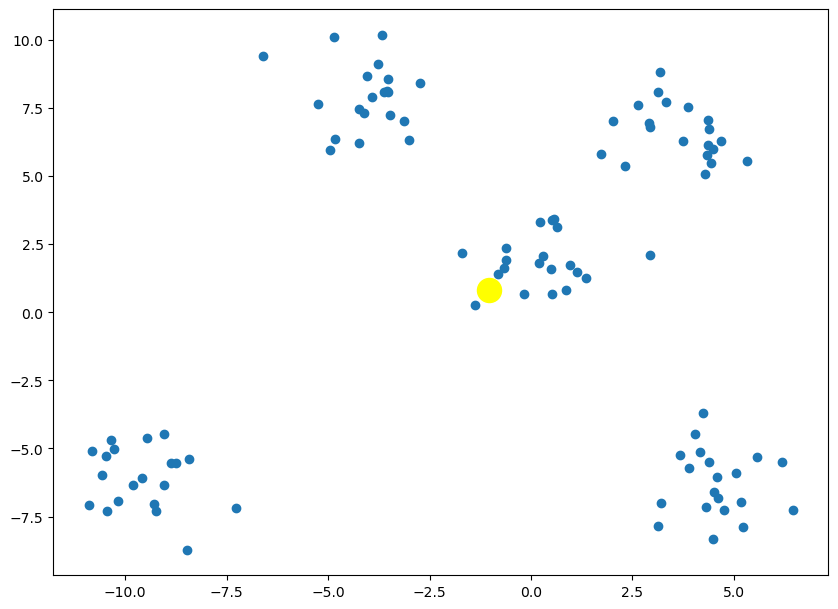

In [17]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()